# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

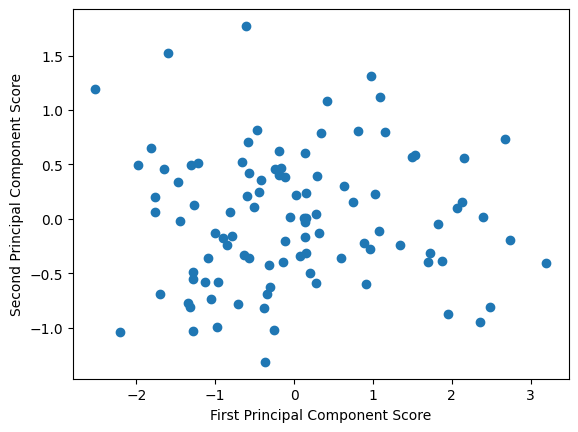

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

Outliers in the Upper Left Corner:

Low PC1: Indicates lower-than-average values in the combined (joint) variation of series_1 and series_2.

High PC2: Indicates unusually high values in series_3.

Why Series_1 and Series_2 Are Hard to Separate:
Because series_2 is generated as a nearly perfect scaling of series_1, they are highly correlated, so most of their joint variability is captured in PC1. Their slight differences appear only in PC3, which does not show up in a 2D plot of PC1 vs. PC2.

Advantages and Disadvantages of the PCA Plot:

Advantages:

It reveals complex multivariate patterns and highlights outliers.

You can easily see that there is a separation between the pattern of series_1/series_2 and series_3.

Disadvantages:

It does not allow you to disentangle the contribution of series_1 relative to series_2 since they contribute almost identically to PC1.

You may lose interpretability regarding the original scale of the individual series.

Important differences in individual variables might appear in later PCs (like PC3) that are not shown.

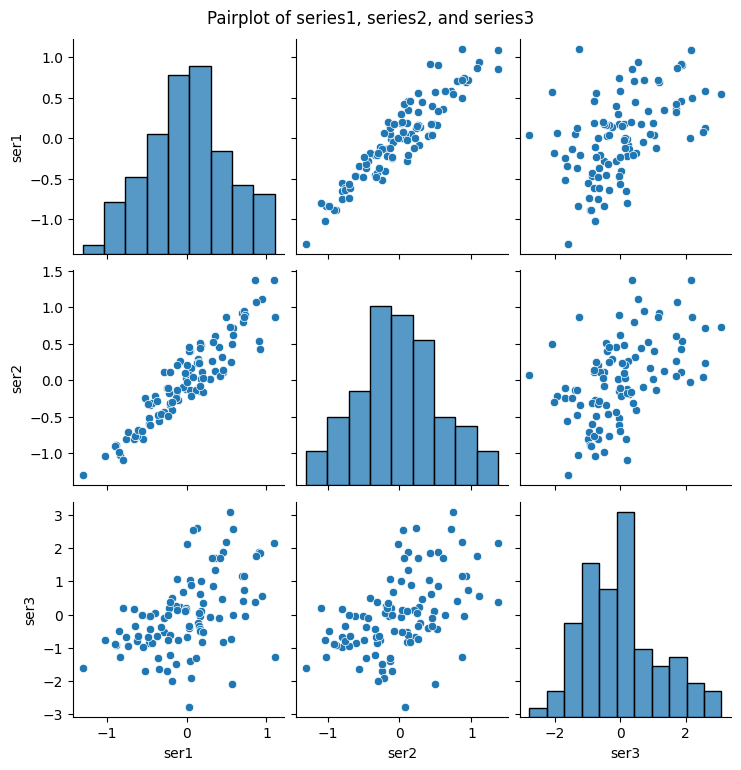

In [2]:
import seaborn as sns
sns.pairplot(df)
plt.suptitle("Pairplot of series1, series2, and series3", y=1.02)
plt.show()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [3]:
df = pd.read_csv('cysrisk.csv')
print(df.head())

           cve_id vendor_project             product  \
0  CVE-2021-27104      accellion                 FTA   
1  CVE-2021-27102      accellion                 FTA   
2  CVE-2021-27101      accellion                 FTA   
3  CVE-2021-27103      accellion                 FTA   
4  CVE-2021-21017          adobe  Acrobat and Reader   

                                  vulnerability_name  date_added  \
0   Accellion FTA OS Command Injection Vulnerability  2021-11-03   
1   Accellion FTA OS Command Injection Vulnerability  2021-11-03   
2          Accellion FTA SQL Injection Vulnerability  2021-11-03   
3                   Accellion FTA SSRF Vulnerability  2021-11-03   
4  Adobe Acrobat and Reader Heap-based Buffer Ove...  2021-11-03   

                                   short_description  \
0  Accellion FTA 9_12_370 and earlier is affected...   
1  Accellion FTA 9_12_411 and earlier is affected...   
2  Accellion FTA 9_12_370 and earlier is affected...   
3  Accellion FTA 9_12_411 and 

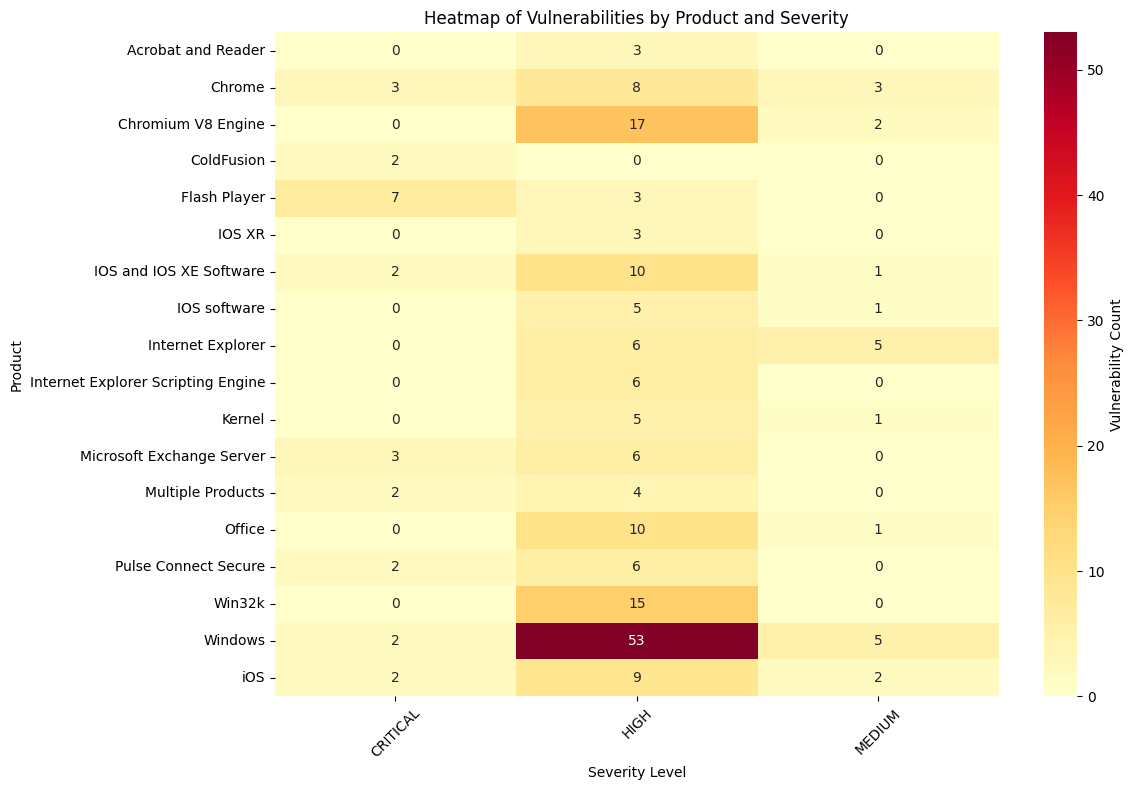

In [15]:
top_products = df['product'].value_counts().head(20).index
filtered_df = df[df['product'].isin(top_products)]

heatmap_data = pd.crosstab(filtered_df['product'], filtered_df['severity'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Vulnerability Count'})
plt.title("Heatmap of Vulnerabilities by Product and Severity")
plt.xlabel("Severity Level")
plt.ylabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


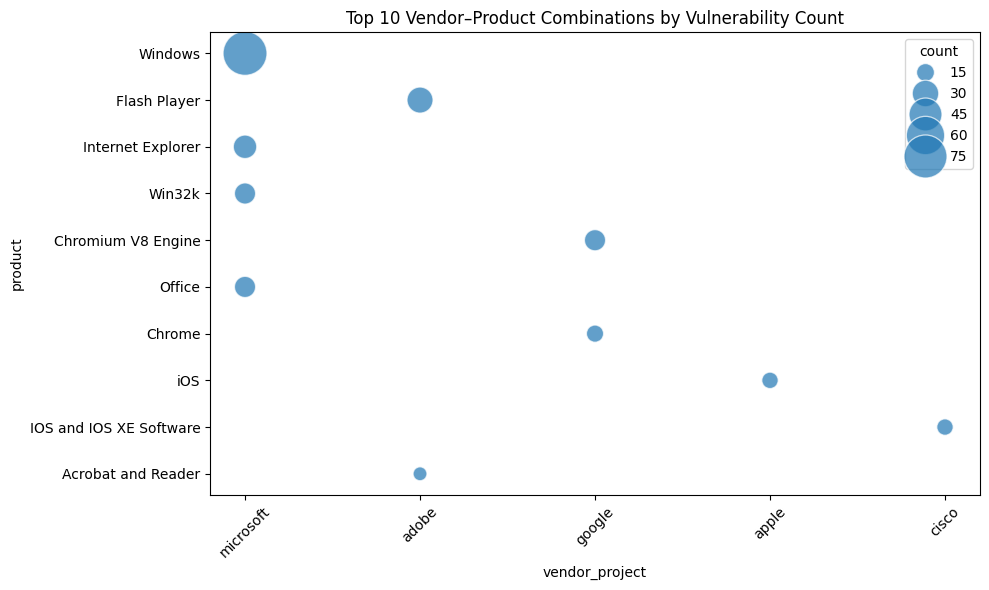

In [19]:
# Group and count
vendor_product_counts = (
    df.groupby(['vendor_project', 'product'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False) 
    .head(10) 
)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=vendor_product_counts,
    x='vendor_project',
    y='product',
    size='count',
    sizes=(100, 1000),
    alpha=0.7
)
plt.title("Top 10 Vendor–Product Combinations by Vulnerability Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Explained Variance by Component: [0.64254286 0.33277875 0.02467839]
PC1 captures 64.25% of variance

Feature contributions to PC1:
cvss: 0.706
days_until_due: 0.048
severity_level: 0.707


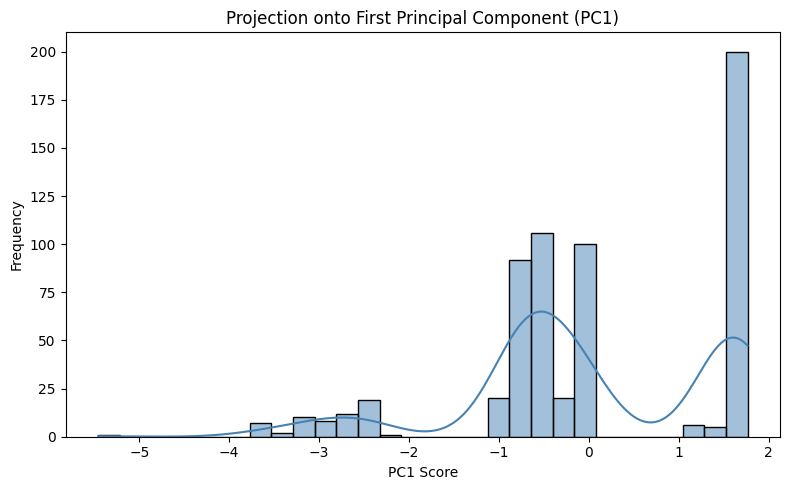

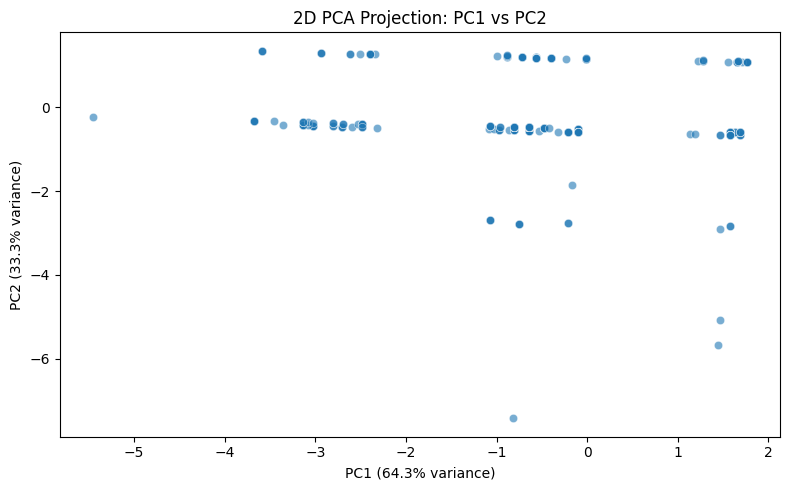

In [28]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['due_date'] = pd.to_datetime(df['due_date'], errors='coerce')

df['days_until_due'] = (df['due_date'] - df['date_added']).dt.days

severity_map = {'LOW': 1, 'MEDIUM': 2, 'HIGH': 3, 'CRITICAL': 4}
df['severity_level'] = df['severity'].map(severity_map)

df['cvss'] = pd.to_numeric(df['cvss'], errors='coerce')
valid_df = df[df['cvss'].notna() & df['days_until_due'].notna() & df['severity_level'].notna()].copy()

X = valid_df[['cvss', 'days_until_due', 'severity_level']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
components = pca.components_

print("Explained Variance by Component:", explained_variance)
print(f"PC1 captures {explained_variance[0]:.2%} of variance\n")
print("Feature contributions to PC1:")
for i, feature in enumerate(['cvss', 'days_until_due', 'severity_level']):
    print(f"{feature}: {components[0][i]:.3f}")

valid_df['PC1'] = X_pca[:, 0]
valid_df['PC2'] = X_pca[:, 1]


plt.figure(figsize=(8, 5))
sns.histplot(valid_df['PC1'], bins=30, kde=True, color='steelblue')
plt.title("Projection onto First Principal Component (PC1)")
plt.xlabel("PC1 Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.scatterplot(x=valid_df['PC1'], y=valid_df['PC2'], alpha=0.6)
plt.title("2D PCA Projection: PC1 vs PC2")
plt.xlabel(f"PC1 ({explained_variance[0]:.1%} variance)")
plt.ylabel(f"PC2 ({explained_variance[1]:.1%} variance)")
plt.tight_layout()
plt.show()



In [29]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['due_date'] = pd.to_datetime(df['due_date'], errors='coerce')

df['days_until_due'] = (df['due_date'] - df['date_added']).dt.days

df['cvss'] = pd.to_numeric(df['cvss'], errors='coerce')

severity_map = {'LOW': 1, 'MEDIUM': 2, 'HIGH': 3, 'CRITICAL': 4}
df['severity_level'] = df['severity'].map(severity_map)

valid_df = df[df['cvss'].notna() & df['days_until_due'].notna() & df['severity_level'].notna()].copy()
features_df = valid_df[['cvss', 'severity_level', 'days_until_due']].dropna()

# ---- Regression 1: Predict CVSS using severity_level + days_until_due
X1 = features_df[['severity_level', 'days_until_due']]
y1 = features_df['cvss']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LinearRegression().fit(X1_train, y1_train)
r2_cvss = r2_score(y1_test, model1.predict(X1_test))

# ---- Regression 2: Predict severity_level using cvss + days_until_due
X2 = features_df[['cvss', 'days_until_due']]
y2 = features_df['severity_level']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LinearRegression().fit(X2_train, y2_train)
r2_severity = r2_score(y2_test, model2.predict(X2_test))

# ---- Regression 3: Predict days_until_due using cvss + severity_level
X3 = features_df[['cvss', 'severity_level']]
y3 = features_df['days_until_due']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
model3 = LinearRegression().fit(X3_train, y3_train)
r2_days = r2_score(y3_test, model3.predict(X3_test))

print(f"R² score for predicting CVSS: {r2_cvss:.3f}")
print(f"R² score for predicting Severity Level: {r2_severity:.3f}")
print(f"R² score for predicting Days Until Due: {r2_days:.3f}")


R² score for predicting CVSS: 0.881
R² score for predicting Severity Level: 0.879
R² score for predicting Days Until Due: -0.008


CVSS ⇄ Severity → High predictive power (R² ~ 0.88)

Days Until Due → Not predictable from CVSS or Severity (R² ~ 0)

The dataset is well-structured and usable after minor cleaning (date parsing, severity mapping, CVSS conversion).

Key fields such as cvss, severity, and date_added are present for most rows, making this dataset suitable for analysis.

Some rows had missing values for cvss and severity, which were handled through filtering.

Principal Component Analysis (PCA) Findings:

PC1 (First Principal Component) captured 64.3% of the variance.

PC1 + PC2 together captured over 97%, meaning the dataset can be effectively reduced to 2 dimensions with minimal information loss.

PC1 was influenced heavily by both cvss and severity_level.

Linear Regression Insights:

Predicting CVSS from severity_level and days_until_due gave a strong R² score of ~0.88.

Predicting severity_level using cvss and days_until_due was also strong (R² ~0.88).

Predicting days_until_due using CVSS or severity failed (R² ≈ 0), which makes sense since due dates are set administratively.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

/var/folders/_t/mfz85_dj1w371jmn2nxvs4r40000gn/T/ipykernel_54981/4045669549.py:17: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  bar_plot = sns.barplot(x='SuperCategory', y='Sales', hue='SubCategory', data=df, palette=palette)


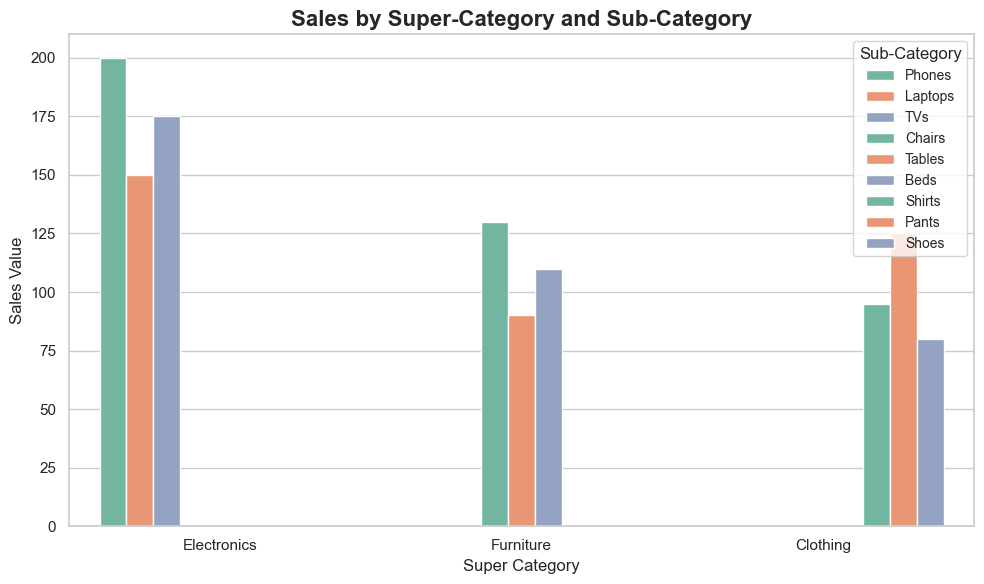

In [4]:
data = {
    'SuperCategory': (['Electronics'] * 3) + (['Furniture'] * 3) + (['Clothing'] * 3),
    'SubCategory': ['Phones', 'Laptops', 'TVs', 
                    'Chairs', 'Tables', 'Beds', 
                    'Shirts', 'Pants', 'Shoes'],
    'Sales': [200, 150, 175,    # Electronics
              130, 90, 110,      # Furniture
              95, 125, 80]       # Clothing
}

df = pd.DataFrame(data)

sns.set(style="whitegrid")
palette = sns.color_palette("Set2", n_colors=3)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='SuperCategory', y='Sales', hue='SubCategory', data=df, palette=palette)

plt.title('Sales by Super-Category and Sub-Category', fontsize=16, weight='bold')
plt.xlabel('Super Category', fontsize=12)
plt.ylabel('Sales Value', fontsize=12)
plt.legend(title='Sub-Category', title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()